# **Laboratorio: Regresión lineal como problema de programación lineal**

Usualmente el  problema de regresión lineal se resuelve usando el criterio de mínimos cuadrados, el cual implica la minimización de una distancia Euclidiana definida a través de la norma $L^2$. En este laboratorio vamos a explorar la forma de resolver el problema de regresión lineal cuando ahora queremos minimizar la distancia de Manhattan, la cual está definida a través de la norma $L^1$. Este problema puede ser formulado como como un problema de programación lineal. Aquí formularemos y solucionaremos un caso de estudio, y verificaremos  que su solución cumple el teorema fundamental de la programación lineal.

# **Descripción del problema**

Consideremos el siguiente problema de regresión. Tenemos parejas de observaciones del predictor $x\in \mathbb{R}$ y la variable a predecir $y\in\mathbb{R}$. Sabemos que la relación entre $x$ y $y$ se define a través de la ecuación
$$y=w_0+w_1 x,$$
donde $w=[w_0, w_1]^T$ son los parámetros del modelo. En el problema de regresión queremos estimar los valores de $w$ a partir de observaciones de los $x$ con sus respectivos valores de $y$. En este problema particular, las observaciones de $x$ con sus respectivos $y$ que tenemos son las siguientes:

|  |  |  | |
|:--------:|:--------:|:--------:|:--------:|
|  x   |  1.1   |  2.15   |  2.93   |
|  y   |  0.98   |  0.09   | -1.6   |

Usando estos datos, planteamos las siguientes ecuaciones de acuerdo con la relación $y=w_0+w_1 x$:

$$
\begin{align}
0.98 = w_0 + 1.1w_1 \\
0.09 = w_0 + 2.15w_1 \\
-1.6 = w_0 + 2.93w_1 \\
\end{align}
$$

El objetivo es encontrar $w=[w_0, w_1]^T$ tal que el lado derecho de las ecuaciones sea lo más cercano al lado izquerdo de las ecuaciones. En otras palabras, queremos minimizar los errores:


Error 1 = $0.98 - (w_0 + 1.1w_1)$

Error 2 = $0.09 - (w_0 + 2.15w_1) $

Error 3 = $-1.6 - (w_0 + 2.93w_1)$


Este es un problema de optimización, donde las variables de decisión son $w_0$ y $w_1$, la región factible es $\mathbb{R}^2$, y la función objetivo a minimizar la podemos plantear de la siguiente forma:
$$
f(w)=|Error \ 1|+|Error \ 2|+|Error \ 3|.
$$
Es decir, queremos encontrar los parámetros $w$ que minimizan la suma de los valores absolutos del error.

Si definimos la matrix $H$ como la matriz que tiene los coeficientes de los $w$:
$$H = \begin{bmatrix}
1 & 1.1\\
1 & 2.15 \\
1 & 2.93\\
\end{bmatrix}$$
y el vector $Y = [0.98, 0.09, -1.6]^T$ con las observaciones de la variable a predecir, la función objetivo $f(w)$ la podemos plantear como

$$ f(w) = ||y - H w||_1.$$

Lo que queremos hacer a continuación es formular este problema como un problema de programación lineal.



# **Planteamiento del problema**

El conjunto de ecuaciones que se tiene es el siguiente:

$$
\begin{align}
0.98 = w_0 + 1.1w_1 \\
0.09 = w_0 + 2.15w_1 \\
-1.6 = w_0 + 2.93w_1 \\
\end{align}
$$

Así, hallar los valores de $w$ que minimizan la distancia usando la norma $L1$ es equivalente a solucionar el siguiente problema de programación lineal:

$$\min_{t,x} [t_1 + t_2 + t_3]$$

sujeto a:

$$0.98 - (w_0 + 1.1w_1) \geq -t_1$$

$$0.98 - (w_0 + 1.1w_1) \leq t_1$$

$$0.09 - (w_0 + 2.15w_1) \geq -t_2$$

$$0.09 - (w_0 + 2.15w_1) \leq t_2$$

$$-1.6 - (w_0 + 2.93w_1) \geq -t_3$$

$$-1.6 - (w_0 + 2.93w_1) \leq t_3$$

$$t_1,t_2,t_3\ge0$$



Para poderlo implementar usando $linprog$ de Scipy, tenemos que reescribir las las restricciones de la siguiente forma:

$$ w_0 + 1.1w_1 - t_1 \leq 0.98$$

$$ -w_0 - 1.1w_1 - t_1 \leq -0.98$$

$$  w_0 + 2.15w_1 - t_2 \leq 0.09$$

$$ -w_0 - 2.15w_1 - t_2 \leq -0.09$$

$$ w_0 +2.93w_1 - t_3 \leq -1.6$$

$$  -w_0 - 2.93w_1 - t_3 \leq 1.6$$

con la función objetivo expresada como
$$\min_{x,t}  [ 0x_1 + 0x_2 + t_1 + t_2 + t_3]$$

Los vectores y matrices del problema de programación lineal, como están en la documentación de $linprog$, quedan:

$$c = [0,0,1,1,1]^T$$

$$A = \begin{bmatrix}
1 & 1.1 & -1 & 0 & 0\\
-1 & -1.1 & -1 & 0 & 0\\
1 & 2.15 & 0 & -1 & 0\\
-1 & -2.15 & 0 & -1 & 0\\
1 & 2.93 & 0 & 0 & -1\\
-1 & -2.93 & 0 & 0 & -1\\
\end{bmatrix}$$

$$b = [0.98,-0.98,0.09,-0.09,-1.6,1.6]^T$$

$$t_1,t_2,t_3 \geq 0$$

El problema es resuelto a continuación:



In [2]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

In [3]:
c = [0,0,1,1,1]

A = np.array([[1,1.1,-1,0,0],[-1,-1.1,-1,0,0],[1,2.15,0,-1,0],[-1,-2.15,0,-1,0],[1,2.93,0,0,-1],[-1,-2.93,0,0,-1]])

b = [0.98,-0.98,0.09,-0.09,-1.6,1.6]

boundaries = [(None,None),(None,None),(0,None),(0,None),(0,None)]

sol = linprog(c, A_ub = A, b_ub = b, bounds = boundaries)

for i,j in zip(["w0","w1","t1","t2","t3"],np.round(sol.x,3)):
  print(f"{i} = {j}")

w0 = 2.531
w1 = -1.41
t1 = 0.0
t2 = 0.59
t3 = 0.0


Este resultado nos indica que $w_0=2.531$ y $-1.41$. Esta es la solución del problema de programación lineal, el cual resuelve nuestro problema de regresión. Al graficar los puntos en la tabla arriba usados para entrenar y la recta $y=w_0+w_1x$ con los valores de $w=[w_0, w_1]^T$ encontrados a través del proceso de optimización, se tiene lo siguiente:

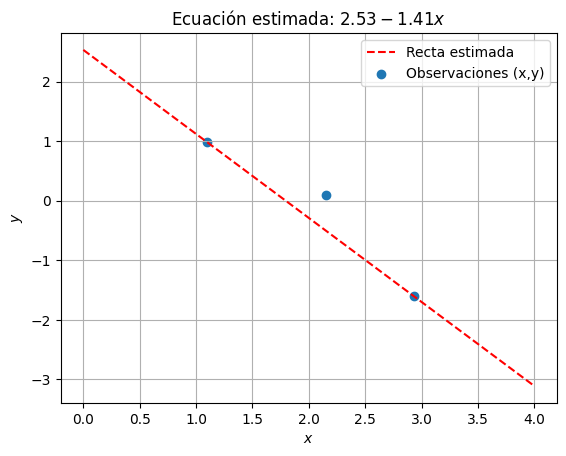

In [4]:
x = np.linspace(0,4)

valores_estimados = sol.x[0] + sol.x[1]*x

plt.figure()
plt.plot(x,valores_estimados,"--r" ,label= "Recta estimada")
plt.scatter([1.1,2.15,2.93],[0.98,0.09,-1.6],label="Observaciones (x,y)")
plt.grid()
plt.title(f"Ecuación estimada: ${round(sol.x[0],2)}{round(sol.x[1],2)}x$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Note que esta recta se intenta ajustar a los datos. Por último, por el teorema fundamental de la programación lineal, se tiene que cumplir que la solución encontrada satisface al menos 2 de las igualdades de las restricciones del problema.

In [6]:
from tabulate import tabulate

vals = np.round(sol.x,2)
w_0,w_1,t_1,t_2,t_3 = vals

print(tabulate([
["w_0 + 1.1w_1 - t_1 <= 0.98",w_0 + 1.1*w_1 - t_1, 0.98] ,

["-w_0 - 1.1w_1 - t_1 <= -0.98", -w_0 - 1.1*w_1 - t_1, -0.98],

["w_0 + 2.15w_1 - t_2 <= 0.09", w_0 + 2.15*w_1 - t_2, 0.09],

["-w_0 - 2.15w_1 - t_2 <= -0.09", -w_0 - 2.15*w_1 - t_2, -0.09],

["w_0 +2.93w_1 - t_3 <= -1.6",w_0 +2.93*w_1 - t_3, -1.6],

[" -w_0 - 2.93w_1 - t_3 <= 1.6",-w_0 - 2.93*w_1 - t_3, 1.6]], headers = ["Restricción","Lado izquierdo de la restricción","Lado derecho de la restricción"]))

Restricción                      Lado izquierdo de la restricción    Lado derecho de la restricción
-----------------------------  ----------------------------------  --------------------------------
w_0 + 1.1w_1 - t_1 <= 0.98                                 0.979                               0.98
-w_0 - 1.1w_1 - t_1 <= -0.98                              -0.979                              -0.98
w_0 + 2.15w_1 - t_2 <= 0.09                               -1.0915                              0.09
-w_0 - 2.15w_1 - t_2 <= -0.09                             -0.0885                             -0.09
w_0 +2.93w_1 - t_3 <= -1.6                                -1.6013                             -1.6
-w_0 - 2.93w_1 - t_3 <= 1.6                                1.6013                              1.6


Así, se evidencia que, en este punto solución, para (aproximadamente) cuatro de las restricciones la igualdad se cumple. Por el teorema de la programación lineal, sabemos que la razón es que el punto encontrado está en el borde de la región factible.

# **Ejercicios**

Asuma que ahora tenemos los siguientes puntos:

|  |  |  | |
|:--------:|:--------:|:--------:|:--------:|
|  x   |  1.5   |  2.25   |  3.2   |
|  y   |  -1.2   |  3.1   | 4.1   |

**1.** Modifique el siguiente código para calcular la solución con linprog del problema de programación lineal. Para esto, calcule la matriz $A$ y el vector $b$.

In [ ]:
c = [0,0,1,1,1]

#Modifique la matriz A
A = np.array([[1,1.1,-1,0,0],[-1,-1.1,-1,0,0],[1,2.15,0,-1,0],[-1,-2.15,0,-1,0],[1,2.93,0,0,-1],[-1,-2.93,0,0,-1]])

#Modifique el vector b
b = [0.98,-0.98,0.09,-0.09,-1.6,1.6]

boundaries = [(None,None),(None,None),(0,None),(0,None),(0,None)]

sol = linprog(c, A_ub = A, b_ub = b, bounds = boundaries)

for i,j in zip(["w0","w1","t1","t2","t3"],np.round(sol.x,3)):
  print(f"{i} = {j}")

**2.** Verifique si se cumple el teorema fundamental de la programación lineal según su solución y el siguiente código. Aquí, sólo ejecute el código de la celda siguiente una vez ejecutado el código de la celda anterior. NO ES NECESARIO MODIFICAR EL CÓDIGO.

In [ ]:
from tabulate import tabulate

vals = np.round(sol.x,2)
w_0,w_1,t1,t2,t3 = vals


print(tabulate([["w_0 + 1.5*w_1 - t_1 == -1.2",w_0 + 1.5*w_1 - t_1, -1.2] ,

["-w_0 - 1.5*w_1 - t_1 == 1.2", -w_0 - 1.5*w_1 - t_1, 1.2],

["w_0 + 2.25*w_1 - t_2 == 3.1", w_0 + 2.25*w_1 - t_2, 3.1],

["-w_0 - 2.25*w_1 - t_2 == -3.1", -w_0 - 2.25*w_1 - t_2, -3.1],

["w_0 +3.2*w_1 - t_3 == 4.1",w_0 +3.2*w_1 - t_3, 4.1],

[" -w_0 - 3.2*w_1 - t_3 == -4.1",-w_0 - 3.2*w_1 - t_3, -4.1]], headers = ["Condición","Condición evaluada","Valor"]))

**3.** Modifique el siguiente código para graficar los puntos dados y la ecuación de la recta encontrada.

In [ ]:
x = np.linspace(1,4)

#Modifique la siguiente linea de código con la ecuación de la recta encontrada.
valores_estimados = 3*x + 1

plt.figure()
plt.plot(x,valores_estimados,"--r" ,label= "Recta estimada")

#Modifique la siguiente linea de código con el scatter de los puntos dados.
plt.scatter([1.1,2.15,2.93],[0.98,0.09,-1.6],label="Valores iniciales")

plt.grid()
plt.title(f"Ecuación estimada: ${round(sol.x[0],2)}{round(sol.x[1],2)}x$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()